# Fase 2 - Análise Exploratória dos Dados (EDA)

Nesta segunda fase do processo de análise de dados, será realizada a Análise Exploratória dos Dados (EDA, do inglês Exploratory Data Analysis), uma etapa essencial para compreender a estrutura e as características do conjunto de dados utilizado. Através dessa análise, buscamos identificar padrões, tendências e possíveis inconsistências que possam impactar o desenvolvimento de modelos preditivos.

Inicialmente, exploraremos a coleta e a estrutura dos dados, verificando a presença de variáveis categóricas e contínuas, bem como sua distribuição. Em seguida, aplicaremos técnicas estatísticas e gráficas para visualizar relações entre os atributos e avaliar a necessidade de pré-processamento adicional. Também discutiremos a qualidade dos dados, abordando aspectos como valores nulos, presença de outliers e desafios decorrentes da normalização aplicada previamente.

Por fim, serão empregadas técnicas de redução de dimensionalidade para verificar a separabilidade das classes e a viabilidade de futuras etapas de modelagem. Através dessa investigação, pretendemos extrair insights relevantes que subsidiem a construção de modelos preditivos mais robustos e eficazes.

## 0. Importando Bibliotecas Externas e o Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from scipy.io import arff
file_path = "../data/raw/electricity-normalized.arff"
data, meta = arff.loadarff(file_path)

df = pd.DataFrame(data)

# Convertendo colunas categóricas de bytes para strings

for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode("utf-8")

## 1. Coleta Inicial dos Dados

Inicialmente realizamos o download da base de dados presente no [OpenML](https://www.openml.org/search?type=data&sort=runs&id=151&status=active). O formato vindo do repositório é um arquivo .arff com 3020Kb. Como foi explicitado na fase 1, esses dados foram coletados entre os anos de 1996 e 1998, os dados abrangem um período de aproximadamente três anos, com medições a cada 30 minutos, totalizando **45.312 registros**.

Cada registro possui 9 features, que são:

| Feature | Contagem de Valores Nulos | Tipo da Feature | Descrição |
| --- | --- | --- | --- |
| date | 45312 non-null | float64 | Data da coleta da informação |
| day | 45312 non-null | object | Dia da semana |
| period | 45312 non-null | float64 | Período do Dia |
| nswprice | 45312 non-null | float64 | Consumo de eletricidade em NSW |
| nswdemand | 45312 non-null | float64 | Demanda de eletricidade em Nova Gales do Sul (NSW) |
| vicprice | 45312 non-null | float64 | Demanda de eletricidade em Victoria |
| vicdemand | 45312 non-null | float64 | Consumo de eletricidade em Victoria |
| transfer | 45312 non-null | float64 | Transferências programadas entre os estados |
| class | 45312 non-null | object | Classe alvo |


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  object 
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), object(2)
memory usage: 3.1+ MB


Toda esses atributos, com exceção da **classe alvo (Class)** e do **dia da semana (day)** são variáveis **contínuas** já **normalizadas** com valores que variam de 0 a 1. Para a classe alvo, temos as strings UP, informando que o preço subiu em relação a última medição e **Down**, informando que houve uma queda no preço. Por fim, a coluna Day, possui valores **categóricos em formato numérico** que variam de 1 a 7 (referentes ao dia da semana).

A análise preliminar do dataset revelou uma qualidade consistente na coleta dos dados, uma vez que nenhuma das features apresenta valores nulos. Isso elimina a necessidade de aplicar algoritmos de substituição de dados ausentes, facilitando o pré-processamento e garantindo maior integridade na análise.

In [5]:
df

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


Inicialmente, realizamos uma análise superficial das variáveis do conjunto de dados, a fim de se obter noções iniciais. Embora os dados estejam normalizados, é possível observar o preço médio para a cidade NSW é maior que para a cidade victoria, mesmo que a demanda seja extremamente parecida para ambas as cidades. 

In [6]:
df.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526
std,0.340308,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912
50%,0.456329,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912
75%,0.880547,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Descrição dos Dados

Nesta etapa, focamos em entender e gerar insights a cerca dos dados do modelo, verificamos a distribuição para cada uma das features do dataset. É importante frisar mais uma vez que os dados já vieram normalizados da fonte, e não sabemos exatamente como essa normalização ocorreu.

### 2.1 Distribuição das Classes Categóricas

#### 2.1.1 Day

A primeira variável categórica do dataset é "day", que representa o dia da semana em que a coleta foi realizada. Essa variável assume valores de 1 a 7 e apresenta uma distribuição equilibrada, indicando que os dados foram coletados de forma homogênea ao longo da semana.

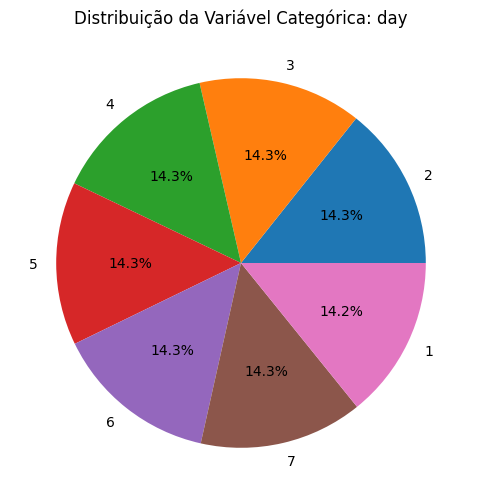

In [7]:
plt.figure(figsize=(6, 6))
df['day'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(f"Distribuição da Variável Categórica: day")
plt.ylabel('')
plt.show()

#### 2.1.2 Class

A outra variável categórica presente no dataset é "class" (classe alvo do dataset), que indica se houve uma variação de preço em relação à última coleta. A análise da distribuição revela que os dados estão parcialmente equilibrados, com 57,5% pertencendo a uma classe e 42,5% à outra. Observamos uma leve tendência maior para a classe "DOWN", indicando uma prevalência de quedas de preço. No entanto, como se trata de uma variável categórica, ela não fornece informações sobre a magnitude da variação, apenas sinaliza sua ocorrência. Em análises futuras, aprofundaremos a investigação sobre a amplitude dessas mudanças de preço.

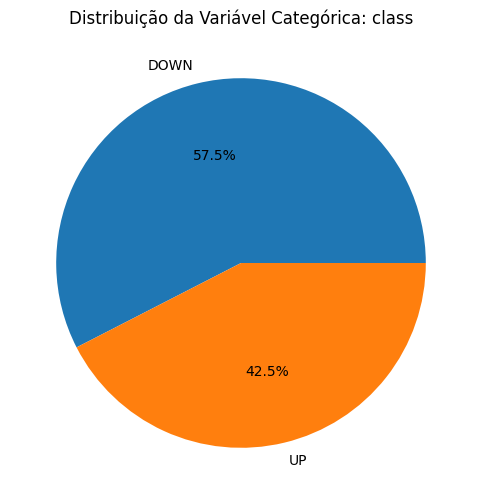

In [8]:
plt.figure(figsize=(6, 6))
df['class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(f"Distribuição da Variável Categórica: class")
plt.ylabel('')
plt.show()

### 2.2 Distribuição das Classes Contínuas

Além das variáveis categóricas, o dataset conta com **sete variáveis contínuas**, todas já **normalizadas**. Isso significa que os dados foram previamente escalonados para uma faixa padronizada, eliminando a necessidade de técnicas adicionais de normalização e garantindo que as diferenças de escala entre as variáveis não influenciem diretamente os resultados.

No entanto, a **ausência dos dados originais** pode trazer desafios significativos. Sem informações sobre o método de normalização utilizado, torna-se mais difícil identificar **outliers** e interpretar corretamente a distribuição dos valores. Além disso, padrões importantes podem ter sido distorcidos ou mascarados pelo processo de normalização, o que pode impactar análises futuras e o desempenho de modelos preditivos.

A seguir, exploraremos cada uma dessas variáveis em detalhes. E no gráfico abaixo, podemos observar a distribuição dessas variáveis via Boxplot.

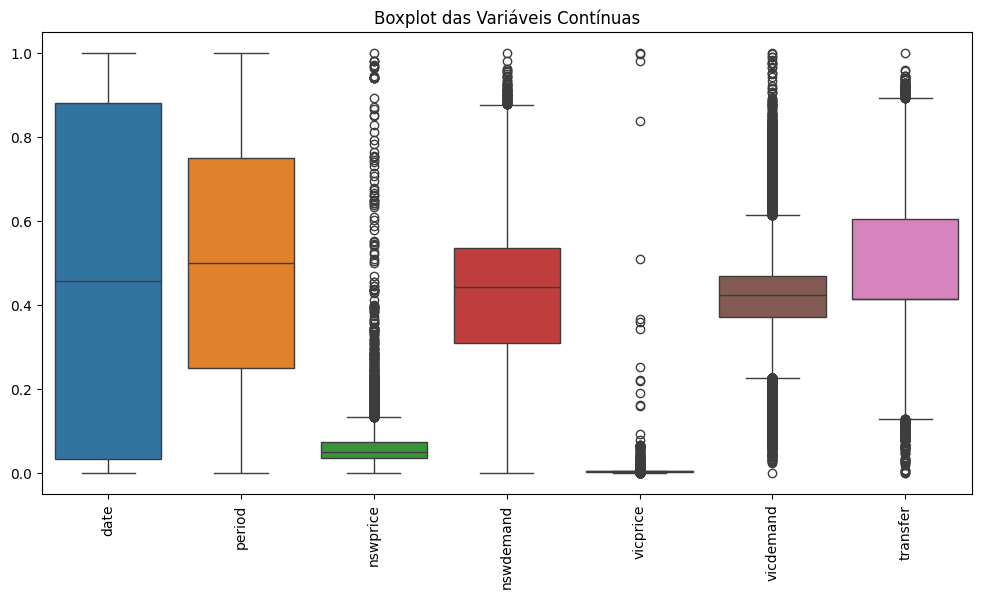

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot das Variáveis Contínuas")
plt.xticks(rotation=90)
plt.show()

#### 2.2.1 Date

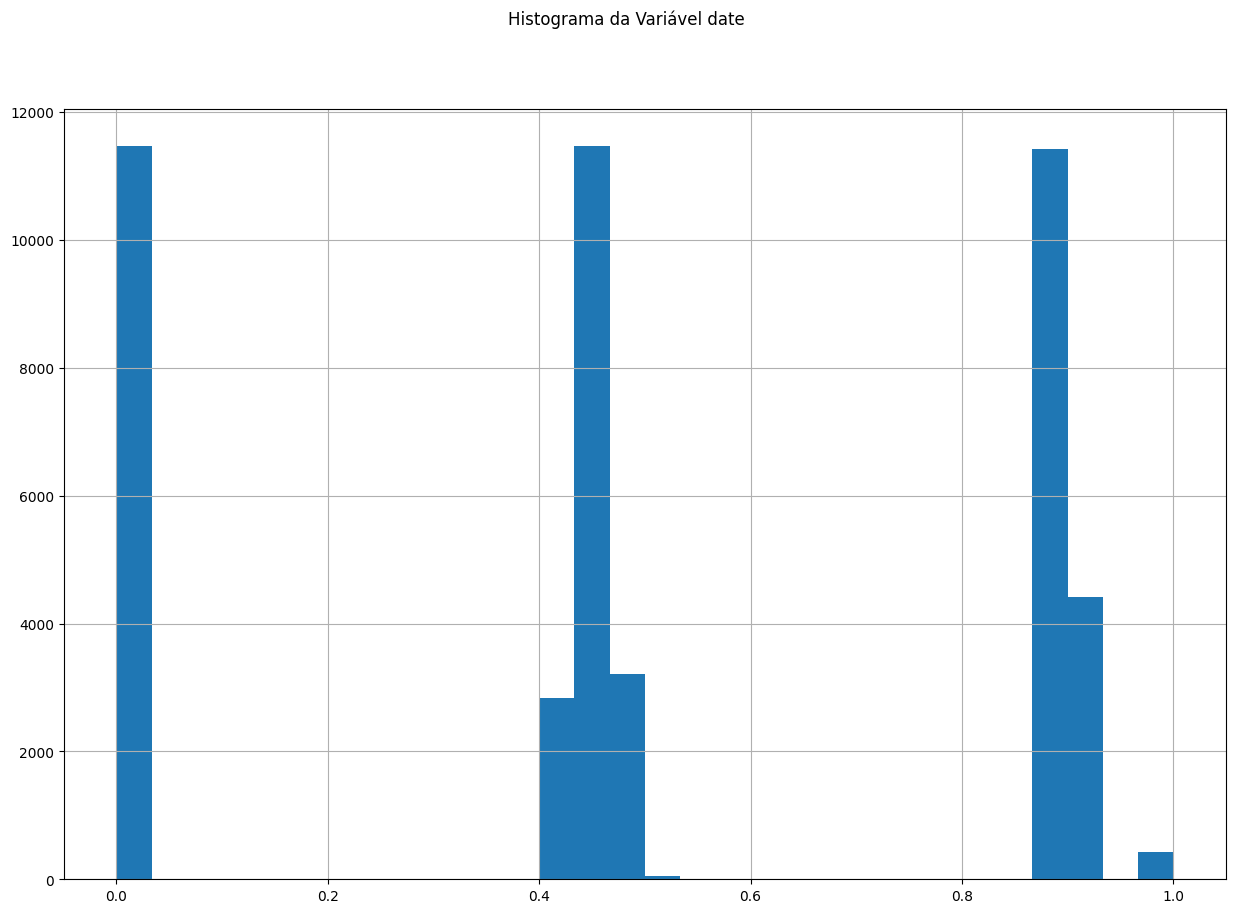

In [10]:
df["date"].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograma da Variável date")
plt.show()

Uma das variáveis contínuas já normalizadas no dataset é a **data**, que, segundo a descrição, representa o **time-stamp** de cada entrada ao longo de três anos. No entanto, sua distribuição apresenta um comportamento peculiar: os valores estão concentrados em **três grandes grupos** – um em torno de **0,05**, outro entre **0,4 e 0,5**, e um terceiro mais extremo próximo de **0,9**.

Essa distribuição incomum pode indicar uma possível anomalia no processo de normalização ou na conversão da data para um valor numérico. Uma hipótese é que a transformação tenha atribuído um peso desproporcional ao ano, criando grandes lacunas entre os dados e resultando na formação desses grupos distintos.

#### 2.2.2 Period

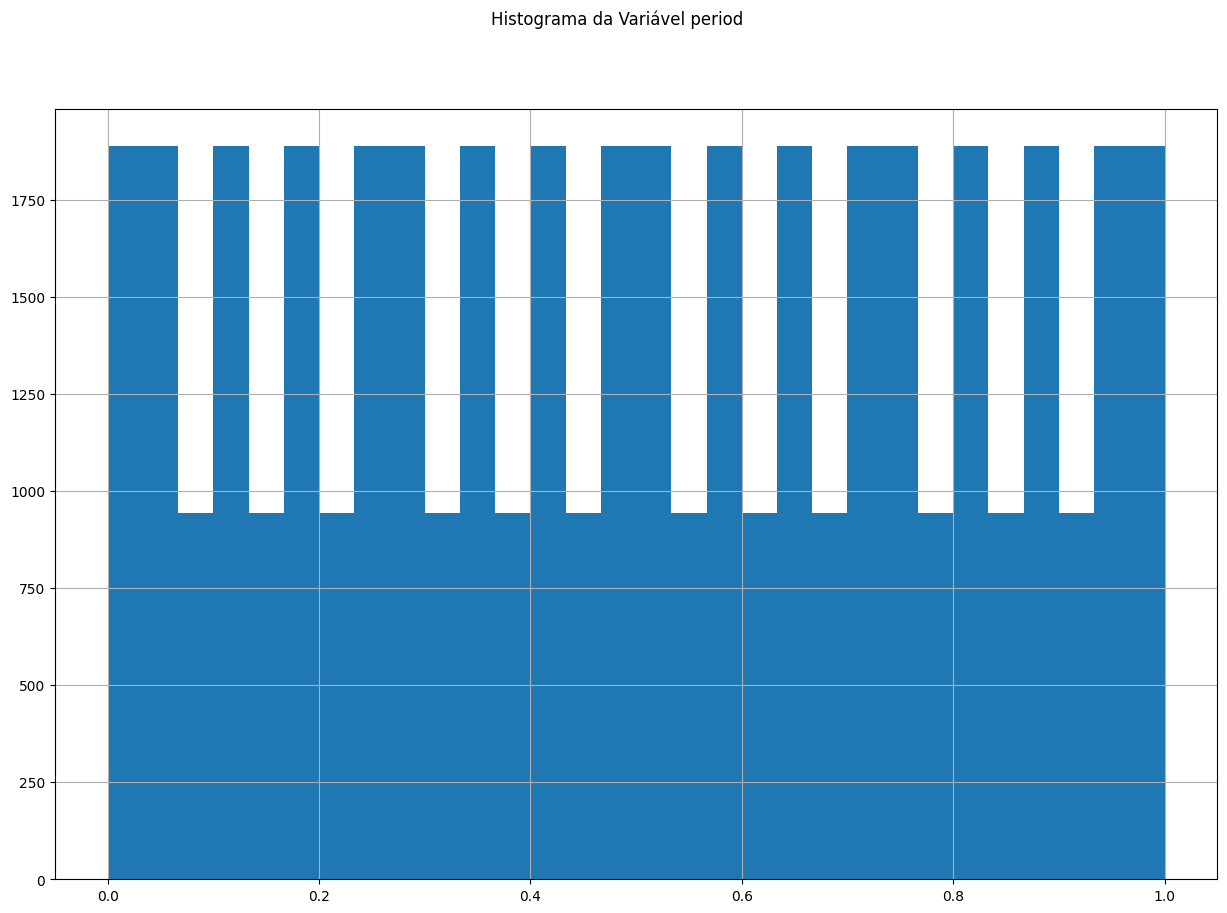

In [11]:
df["period"].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograma da Variável period")
plt.show()

A variável **period** apresenta um comportamento peculiar após a normalização. Como esperado, há 48 períodos diários, correspondendo às coletas realizadas a cada 30 minutos. No entanto, ao analisar a distribuição, percebemos um padrão que lembra uma função senoidal sobreposta a um piso constante. Os valores alternam entre um pouco abaixo de 1000 e quase 2000, criando uma oscilação regular.

Uma possível explicação para esse fenômeno pode estar relacionada à **frequência de coleta ao longo do dia**. Esse padrão sugere que, em determinados períodos do dia, há uma maior concentração de registros, enquanto em outros a frequência diminui ligeiramente. Isso pode ser reflexo de variações na atividade do sistema de coleta de dados, que pode operar com alguma **variação cíclica** devido a processos internos, como horários de pico e menor atividade.

Outra hipótese, e a mais aceita pelo grupo, é que a normalização pode ter **introduzido ou amplificado essa oscilação**, dependendo da forma como os valores foram escalonados. Se a normalização considerou um período completo, mas a distribuição original dos dados já possuía flutuações naturais ao longo do dia, isso pode ter resultado nesse efeito visual no gráfico.

Para confirmar essas suposições, seria interessante observar a distribuição antes da normalização e verificar se há algum **padrão temporal recorrente** nas coletas, como uma maior frequência em horários específicos.

#### 2.2.3 nswprice

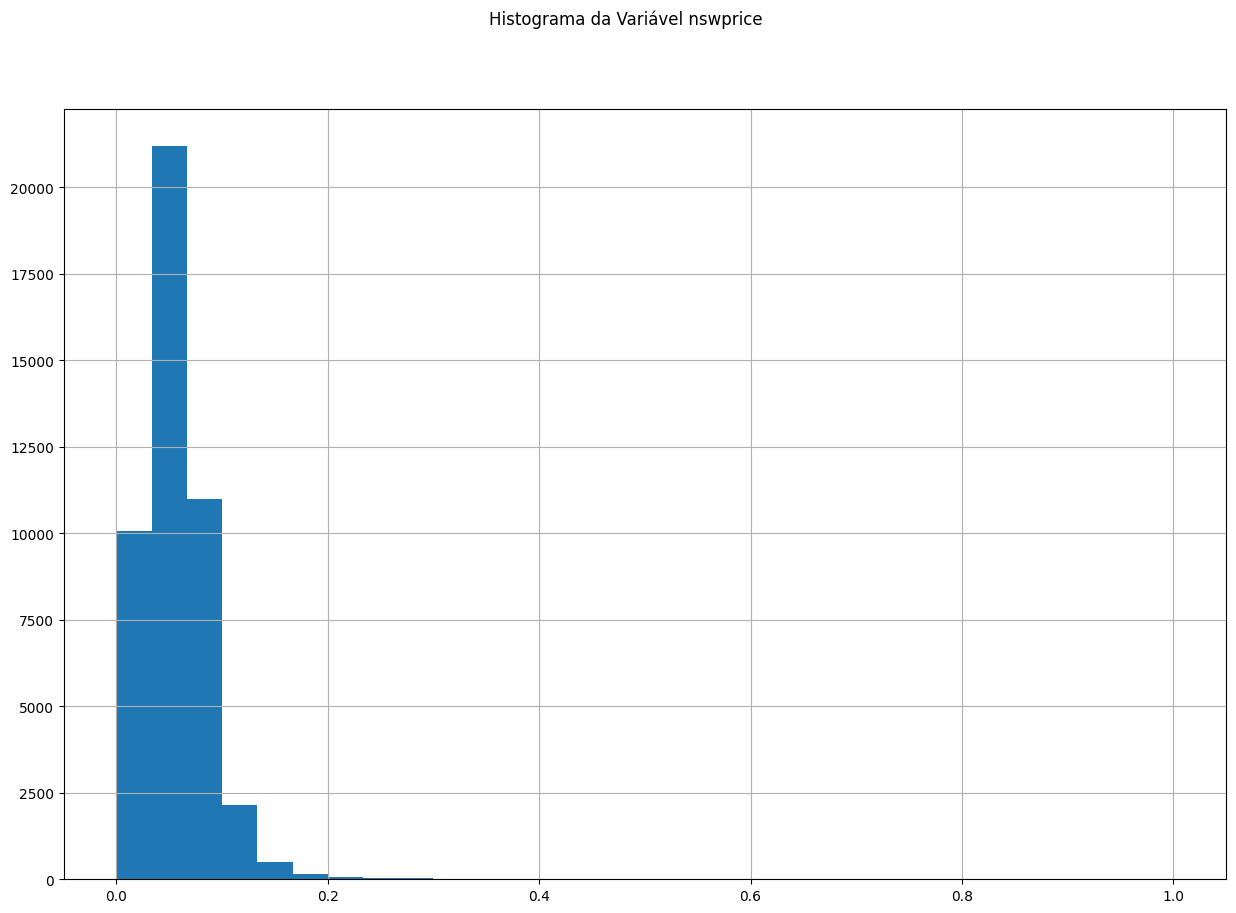

In [12]:
df["nswprice"].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograma da Variável nswprice")
plt.show()

A variável **"nswprice"** representa a distribuição do preço da energia em **Nova Gales do Sul (NSW)** e exibe um comportamento interessante em sua distribuição. O histograma revela uma **concentração significativa de valores entre 0.0 e 0.2**, sugerindo que a maior parte dos preços originais estava em uma faixa relativamente baixa.

Esse efeito pode ser atribuído à aplicação de uma técnica da família do **Min-Max Scaling**, que reescala os valores para um intervalo entre 0 e 1. No entanto, essa normalização pode ter sido fortemente influenciada por outliers, valores extremamente altos que deslocam a maior parte dos dados para a região inicial da escala. Como resultado, a distribuição normalizada se torna assimétrica, com uma **cauda longa à esquerda**, indicando que poucos registros possuem preços significativamente mais altos.

Além dessa hipótese, um detalhe interessante é que, dentro do intervalo **0.0 a 0.2**, a distribuição parece assumir um formato **gaussiano**, ainda que deslocado para a esquerda. Normalmente, ao aplicar **Min-Max Scaling** em uma distribuição uniforme ou altamente assimétrica, espera-se uma concentração mais acentuada em um dos extremos. No entanto, a simetria dentro dessa faixa sugere que, antes da normalização, os preços poderiam já apresentar uma distribuição naturalmente concentrada em valores baixos, possivelmente seguindo uma distribuição normal truncada.

Outro ponto a ser destacado é que, em uma normalização **Min-Max** ideal, a média esperada dos valores deveria estar aproximadamente em **0.5** caso a distribuição original fosse simétrica. Entretanto, aqui observamos uma **distribuição fortemente deslocada para a esquerda**, com a maior parte dos valores longe do centro esperado. Esse comportamento pode indicar que a maior parte dos preços ao longo do tempo **se manteve em uma faixa estável e relativamente baixa**, com apenas alguns picos ocasionais influenciando a normalização.

Para compreender plenamente o comportamento do conjunto de dados e a real distribuição dos preços, seria essencial ter acesso aos valores originais antes da normalização. No entanto, como o dataset já foi pré-processado, enfrentamos o desafio de interpretar padrões sem conhecer a escala real dos dados. Isso limita nossa análise e nos leva a formular hipóteses, como as mencionadas anteriormente, baseadas nas características da distribuição observada. Ainda assim, essas suposições nos ajudam a entender melhor os possíveis impactos da normalização e sugerem caminhos para investigações futuras, como a aplicação de outras técnicas de escalonamento ou a análise da distribuição original dos preços ao longo do tempo.

#### 2.2.4 vicprice

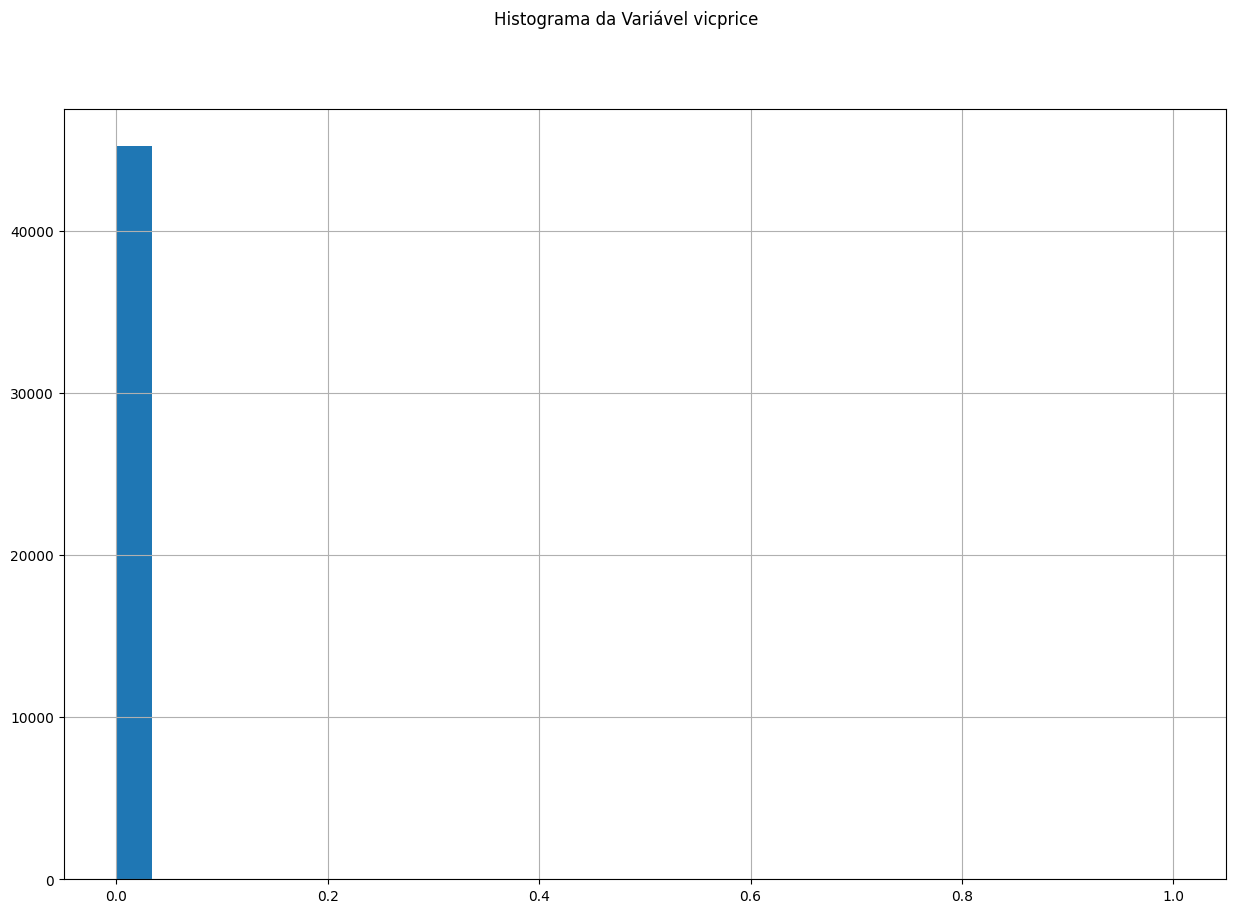

In [13]:
df["vicprice"].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograma da Variável vicprice")
plt.show()

A variável **vicprice**, que representa a demanda de eletricidade em Victoria, exibe um comportamento semelhante ao observado em "nswprice", mas de forma ainda mais extrema. Enquanto **nswprice** concentrava grande parte dos valores entre 0.0 e 0.2, aqui praticamente todos os registros estão entre 0.0 e 0.1, resultando em uma distribuição que visualmente se assemelha a uma linha reta no histograma.

Esse padrão reforça a hipótese de que a normalização aplicada (possivelmente **Min-Max Scaling**) pode ter sido fortemente impactada por **outliers**, como já explicado anteriormente. 

A ausência de uma distribuição mais ampla dificulta a interpretação dos dados e pode mascarar padrões importantes. Sem acesso aos valores originais, não é possível determinar se essa concentração extrema reflete a distribuição real ou se foi induzida pela normalização. Isso reforça a importância de analisar os dados brutos para uma compreensão mais precisa da variável.

#### 2.2.5 nswdemand

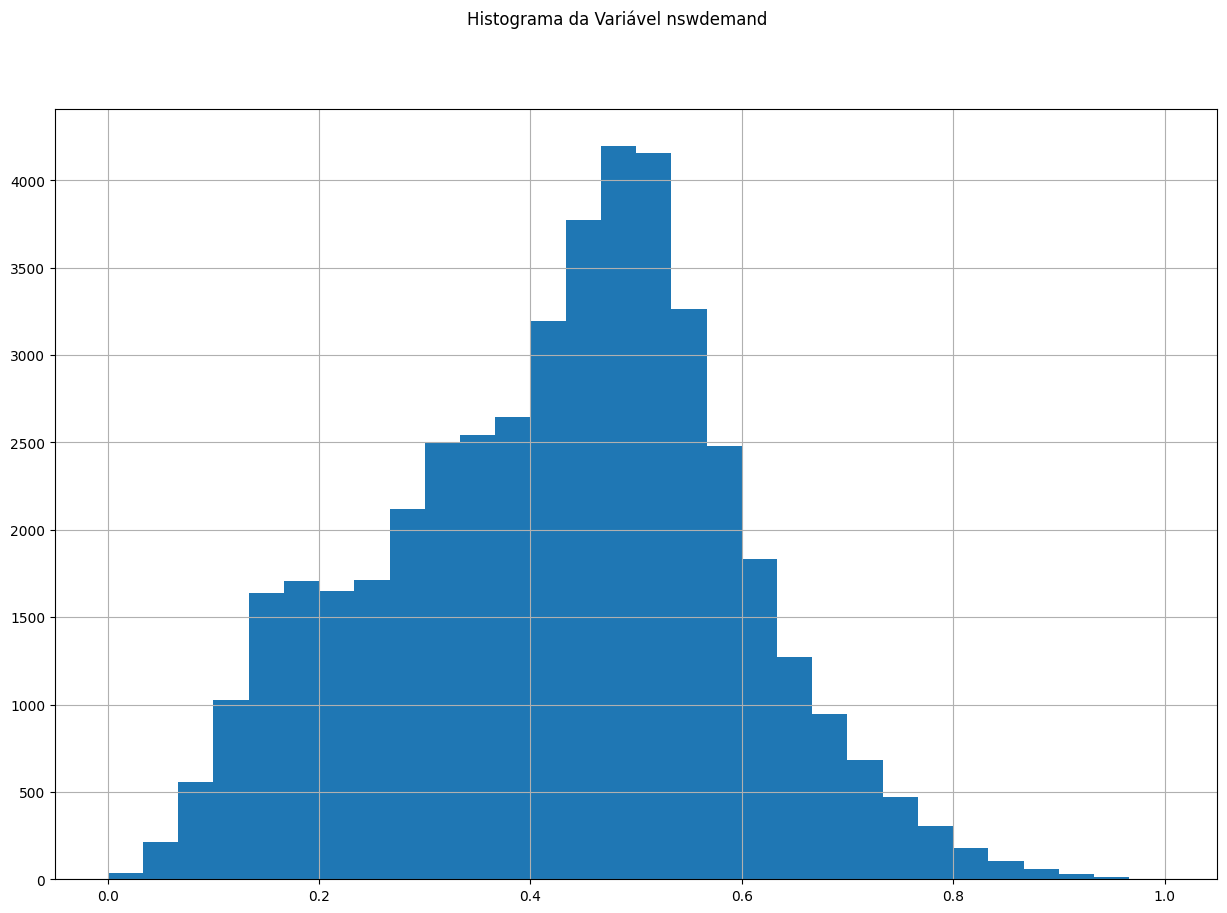

In [14]:
df["nswdemand"].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograma da Variável nswdemand")
plt.show()

A variável **nswdemand**, que representa a demanda de energia em NSW, exibe uma distribuição aproximadamente normal, com a maioria dos valores concentrados em torno de **0.5**. No entanto, ao analisar a simetria, nota-se que a cauda direita apresenta uma queda mais acentuada em comparação à esquerda, indicando uma distribuição **levemente enviesada para a esquerda**.

Esse comportamento sugere que a demanda de energia na cidade de Nova Gales do Sul tende a se manter dentro de uma faixa relativamente estável, com valores médios sendo os mais frequentes. A assimetria pode estar relacionada a **picos ocasionais de consumo**, impulsionados por fatores como **horários de maior atividade, variações sazonais, eventos específicos ou** **limite natural para o aumento da demanda**, possivelmente refletindo o próprio padrão de consumo da região. Buscamos por políticas públicas,no período observado, como o sistema de **bandeiras tarifárias**, que poderiam influenciar esse comportamento, mas a cidade não adota um mecanismo semelhante. Isso sugere que esse limite não é imposto artificialmente por incentivos econômicos, mas sim pela própria necessidade energética da população, que raramente ultrapassa certos patamares de consumo.

#### 2.2.6 vicdemand

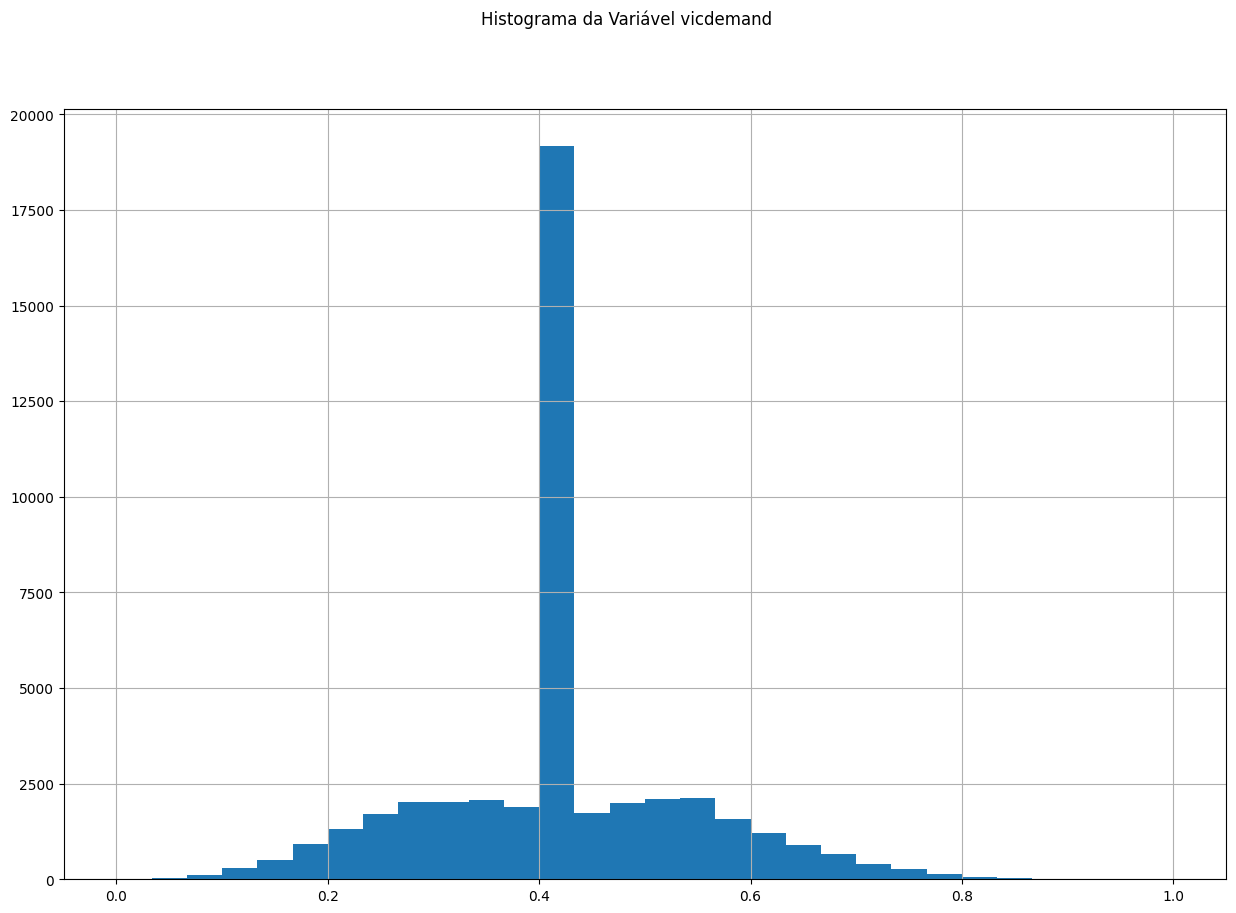

In [15]:
df["vicdemand"].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograma da Variável vicdemand")
plt.show()

A variável **vicdemand**, que representa a demanda de energia em Victoria, apresenta uma distribuição que, à primeira vista, se aproxima de uma **distribuição normal** com uma leve assimetria à esquerda. No entanto, um aspecto se destaca de forma evidente: um pico extremamente concentrado no valor da média (0.422915), na qual possui cerca de 38.45% de todos os valores registrados.

Ao comparar esse comportamento com a variável correspondente de NSW, nota-se que esta última possui uma distribuição mais espalhada, sem uma concentração tão extrema em um único ponto. A explicação para esse fenômeno, é devido não ter uma medição desses dados no início da coleta de dados, e foi utilizado um algoritmo para substituir valores ausentes pelo valor médio, como foi citado na **Fase de Entendimento do Problema**. Esse comportamento pode impactar significativamente em modelos preditivos.

#### 2.2.7 transfer

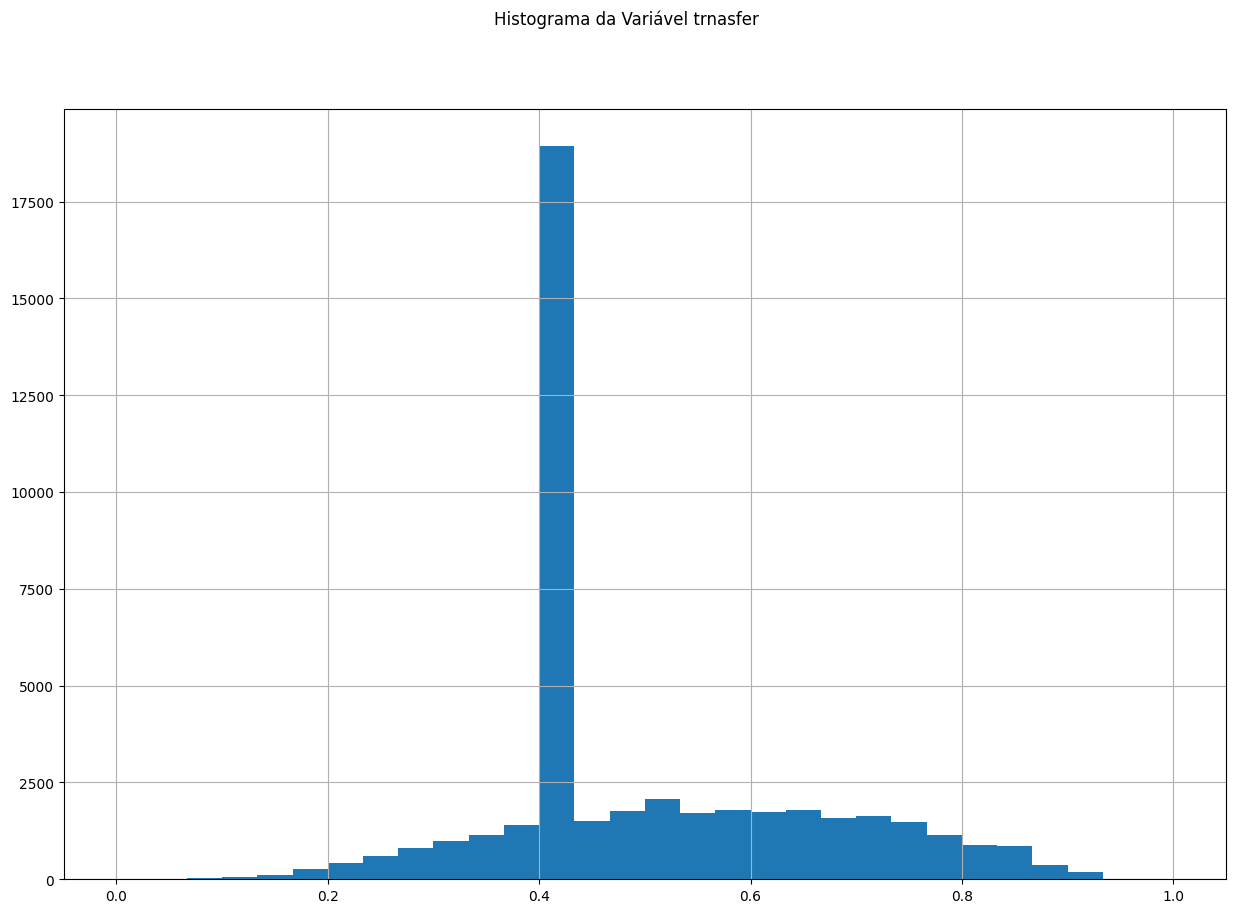

In [16]:
df["transfer"].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograma da Variável trnasfer")
plt.show()

A variável **transfer**, que representa as transferências programadas entre estados, apresenta uma alta concentração de quase 40% em um valor específico, semelhante ao padrão observado em **vicdemand**, porém enquanto a anterior os valores se concentravam no valor da média, nessa distribuição esse comportamento não se repete. Isso sugere uma possível **correlação entre as variáveis** ou um efeito do processo de coleta e normalização.

Se desconsiderarmos essa concentração, a distribuição restante se aproxima de uma distribuição normal bem balanceada, com um centroide próximo ao meio da escala. No entanto, como falado anteriormente, essa anomalia pode distorcer análises e impactar modelos preditivos, tornando essencial investigar sua origem e aplicar técnicas de tratamento, como remoção ou reponderação de valores atípicos.

## 3. Exploração dos Dados

Durante essa etapa, buscamos correlacionar as variáveis, a fim de tentar entender como elas poderiam impactar na classe alvo. Durante essa etapa, buscamos também gerar insights a cerca do dados, buscando padrões e verificar se houve mudança na características dos dados ao longo do tempo.

### 3.1 Matriz de Correlação

Abaixo apresentamos a matriz de correlação entre as features com a classe alvo, onde cada célula representa o coeficiente de correlação de Pearson entre duas variáveis numéricas. Observa-se uma correlação positiva forte entre **nswdemand** e **vicdemand** (0.67) e uma correlação moderada entre **nswprice** e **vicdemand** (0.31), indicando que a demanda em diferentes regiões pode estar relacionada e que os preços podem ter influência na quantidade demandada, uma vez que os dados seguem as mesmas características. Em contrapartida, há uma correlação negativa significativa entre **transfer** e **vicdemand** (-0.56), sugerindo que transferências entre regiões afetam negativamente a demanda, uma vez que uma demanda mas baixa há a tendência de sobrar energia e consequentemente a transferência de energia entre as cidades tende a aumentar. 

Por fim, as features **Day** e **date**, apresentam valores próximos de zero para outras colunas, indicando ausência de relação linear clara, principalmente com a varável alvo, o que pode indicar que elas não possuem relevância na classificação se o preço irá subir ou descer.

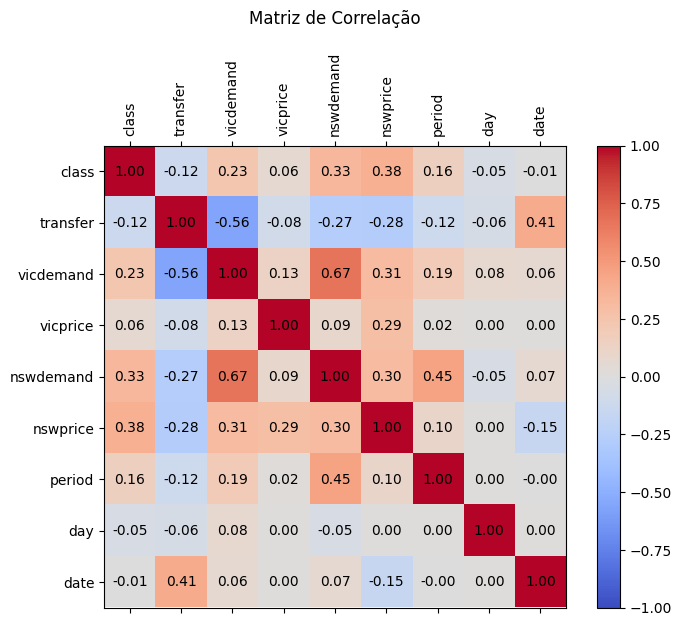

In [17]:
df['class'] = df['class'].apply(lambda val: 1 if val == 'UP' else 0)

corr = df.corr().iloc[::-1, ::-1]

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)

for (i, j), val in np.ndenumerate(corr):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')


ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.xticks(rotation=90)

plt.title("Matriz de Correlação", pad=20)
plt.show()

### 3.2. Valores das Variáveis Contínuas ao longo do tempo

Para essa análise, buscamos entender como o **preço**, a **demanda** e a **transferência da energia máximos** de um dia variam de acordo com o tempo. Essa análise é importante para detectar padrões nos dados, bem como entender sua distribuição e valores ao longo do mês.

É possível observar uma correlação alta entre preço e demanda, quando o preço sobe no seu gráfico a demanda para o mesmo período tende a ser alta também. Isso corrobora com a lógica de mercado em que vivemos, em que a medida em que a demanda por energia cresce, o seu preço logicamente acompanha esse crescimento.

In [18]:
def variacao_pelo_tempo(variavel):
    precos_maximos_diarios = []
    medicoes_por_dia = 48
    
    for i in range(0, len(df), medicoes_por_dia):
        max_diario = df[variavel][i:i+medicoes_por_dia].max()
        precos_maximos_diarios.append(max_diario)
    dias = np.arange(len(precos_maximos_diarios))
    
    # Criar o gráfico de dispersão
    plt.figure(figsize=(20, 5))
    plt.scatter(dias, precos_maximos_diarios, color='b', label='Preço Máximo Diário', s=10)
    # Label do gráfico
    plt.xlabel('Dias')
    plt.ylabel('Preço Máximo')
    plt.title(f'Variação da {variavel} Máxima Diária ao Longo do Tempo')
    plt.xticks(rotation=45)
    plt.xlim(min(dias), max(dias))
    plt.legend()
    plt.grid()
    plt.show()

#### 3.2.1 nswprice

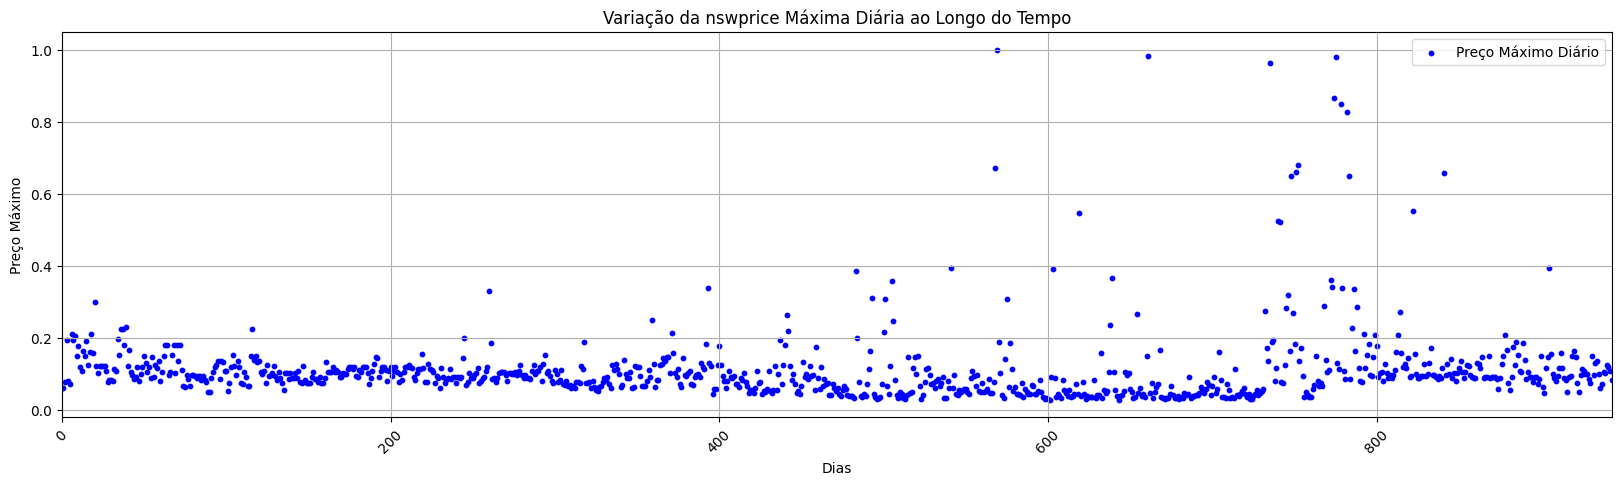

In [19]:
variacao_pelo_tempo('nswprice')

Como é possível analisar no gráfico, o preço máximo diário da energia em NSW é majoritariamente estável, a maioria dos pontos se concentra em valores baixos, próximos de 0.0 a 0.8, mas ocasionalmente apresenta eventos extremos, o que representa uma alta volatilidade. Esses picos podem ser indicativos de mudanças abruptas na oferta ou demanda, possivelmente relacionados a fatores externos, como desastres naturais ou problemas no fornecimento de energia. É importante acrescentar também que não há uma tendência clara de aumento ou diminuição sistemática ao longo do tempo, sugerindo que o comportamento dos preços pode ser influenciado por fatores externos específicos.

#### 3.2.2 nswdemand

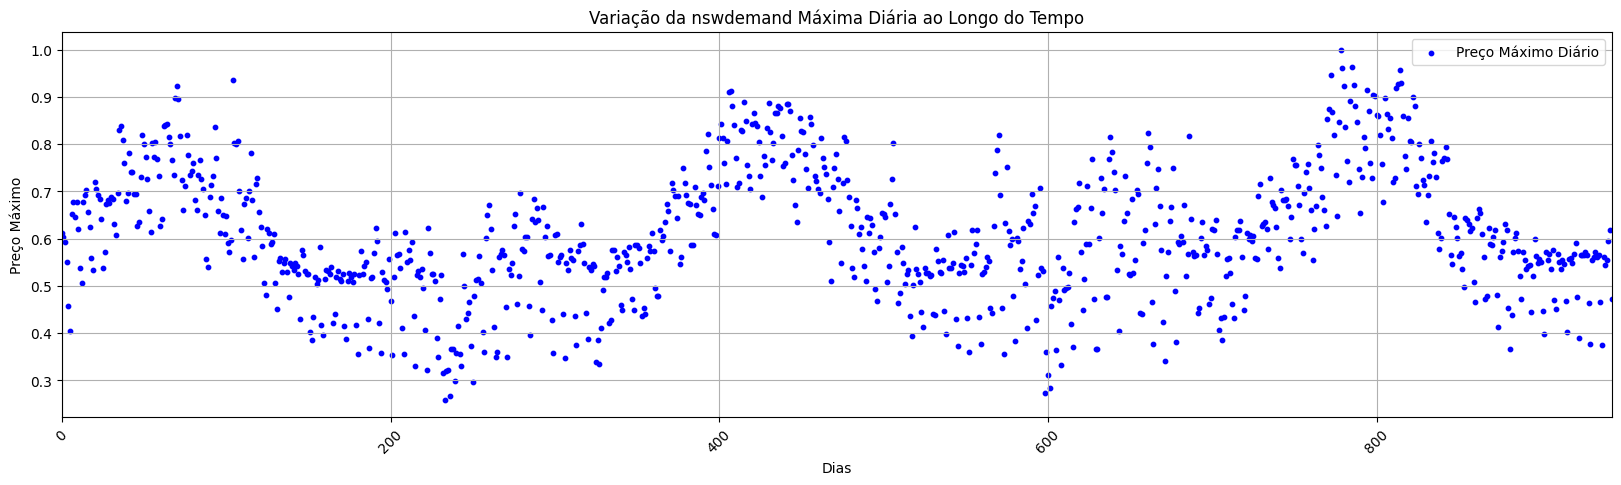

In [20]:
variacao_pelo_tempo('nswdemand')

Diferentemente do gráfico anterior, que mostrava variações irregulares no preço, o gráfico da demanda apresenta uma tendência cíclica bem definida em NSW. Observa-se uma padrão de alta e baixa recorrente, possivelmente associado à sazonalidade do consumo energético, como diferenças sazonais ao longo do ano (por exemplo, picos no inverno e no verão devido a maior demanda de aquecimento e refrigeração, embora por conta da normalização, não sabemos em que dia exatamente essas medições começaram).
Ainda assim, mas ao final do gráfico é possível observar períodos de alta demanda coincidem com picos de preço.

#### 3.2.3 vicprice

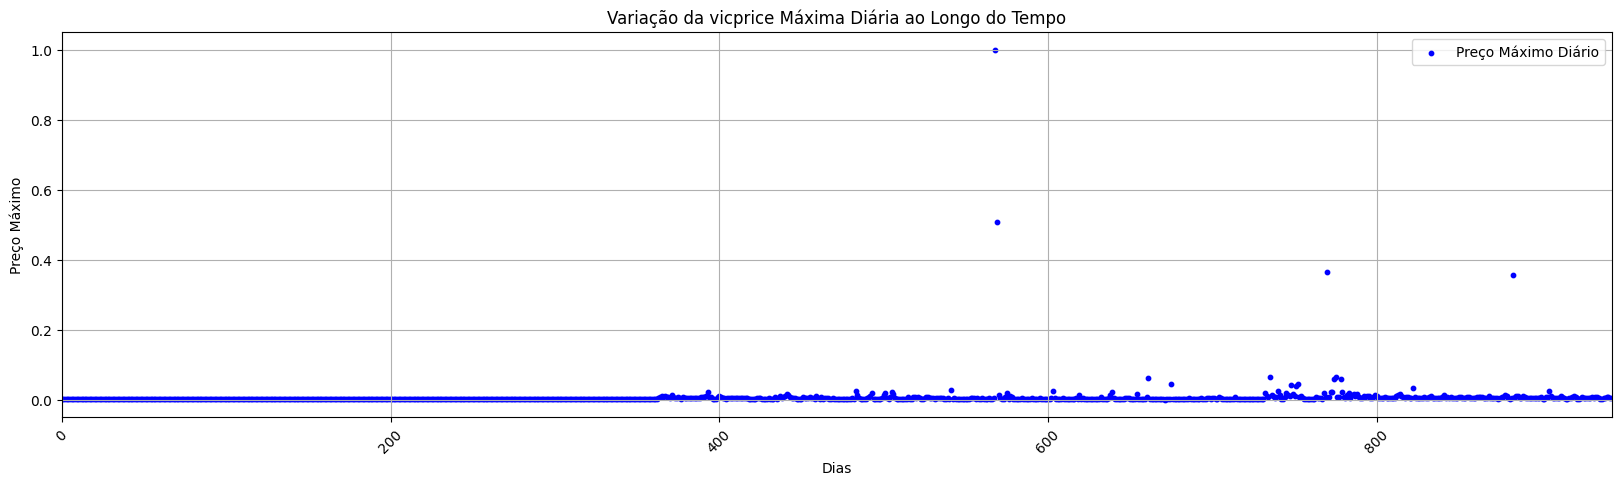

In [21]:
variacao_pelo_tempo('vicprice')

Nesse histograma, podemos observar que a grande maioria dos pontos está muito próxima de **0.0**, indicando que, na maior parte do tempo, o preço máximo diário da energia em Victoria permaneceu **extremamente baixo e estável**. Isso indica um mercado com uma menor volatilidade do preço, mesmo com a mudança da demanda (como será explicitado no próximo gráfico). 

Como já explicitado em outros tópicos, existem poucos pontos dispersos acima de 0.2, e em algumas ocasiões isoladas os valores ultrapassam **0.8 e até 1.0**, sugerindo **eventos anômalos**. E essas medições iniciais foram impactadas pela adição posterior dessa feature.

#### 3.2.4 vicdemand

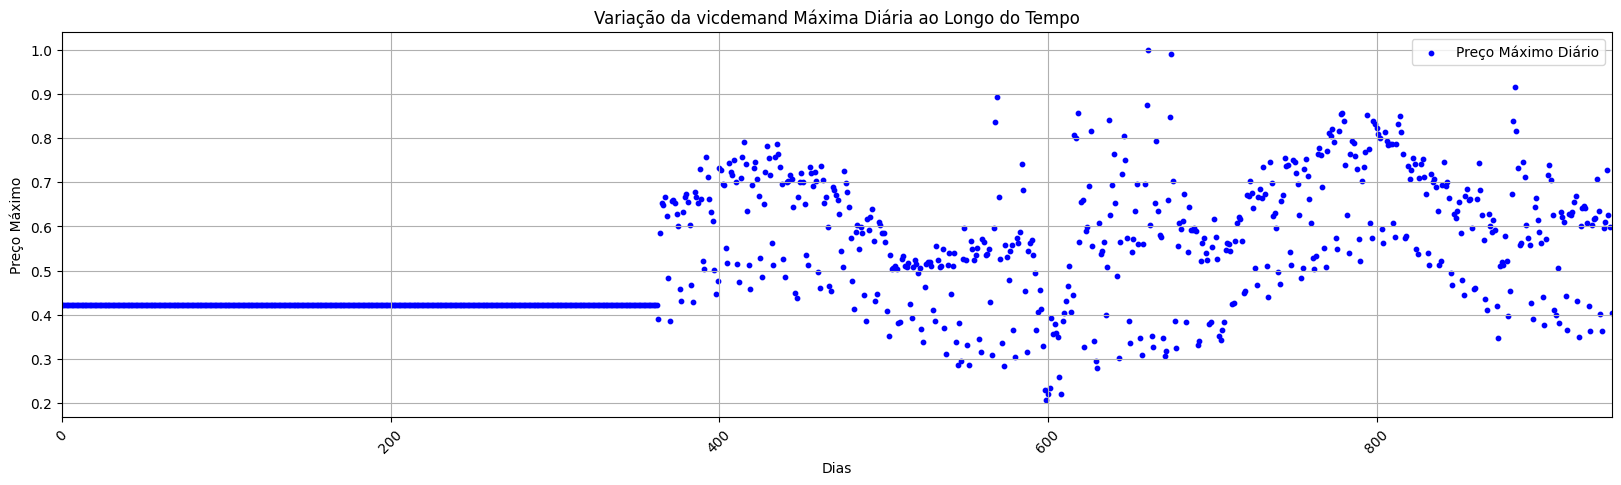

In [22]:
variacao_pelo_tempo('vicdemand')

Nos primeiros **400 dias**, a demanda máxima diária permanece **fixa em aproximadamente 0.45**, sem qualquer variação, o que é o esperado quando analisamos os dados de Victoria, visto que o processo inicial de coleta do dataset apenas abrangia a região de Nova Gales do Sul, e só no meio do processo de coleta que foi introduzida a região de Victoria, é importante frisar que o mesmo ocorre com a varável **vicprice**. Após os **400 dias**, a demanda passa a apresentar oscilações cíclicas, semelhantes às observadas na demanda de Nova Gales do Sul (NSW).

Essa “anomalia” pode ter um impacto significativo no treinamento e no desempenho de modelos preditivos, especialmente se não for devidamente tratada. Modelos treinados com esses dados podem aprender padrões artificiais ou errôneos, comprometendo sua capacidade de generalização. Dependendo da abordagem utilizada, pode ser necessário aplicar técnicas de tratamento de outliers, remoção de períodos inconsistentes ou reponderação dos dados para minimizar o viés causado por essa irregularidade.

#### 3.2.5 Transfer

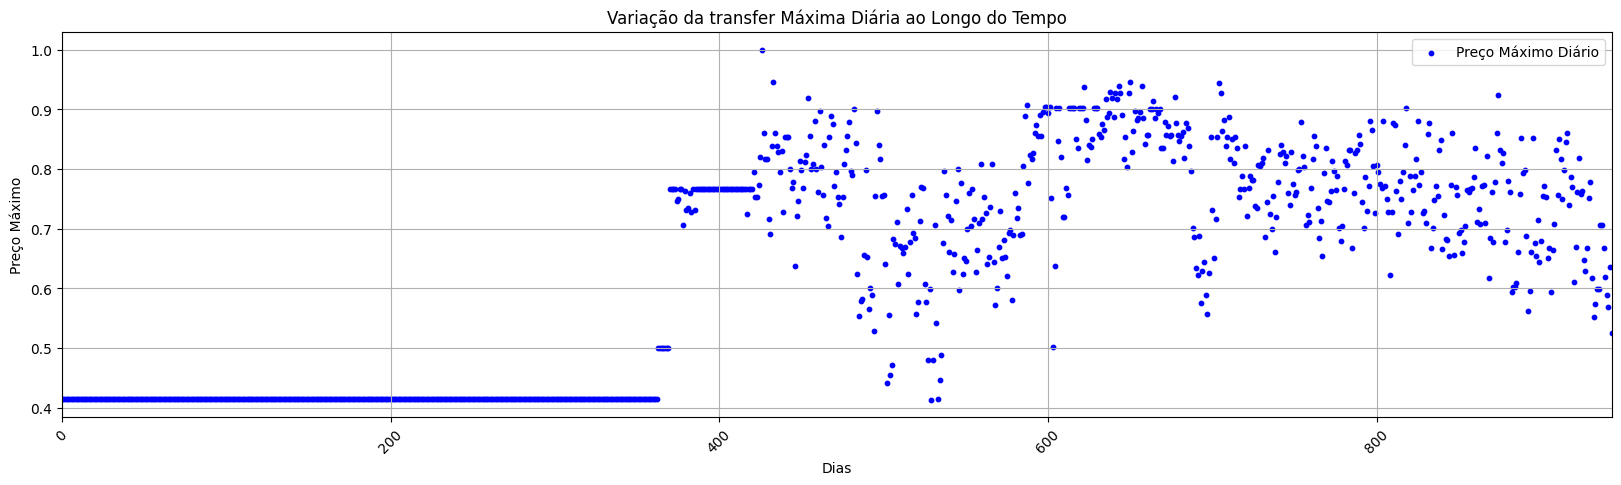

In [23]:
variacao_pelo_tempo('transfer')

Similar ao vicdemand, nos primeiros 400 dias, os valores da transferência máxima diária permanecem praticamente fixos em aproximadamente 0.4, sem qualquer variação significativa, e após os primeiros 400 dias, observa-se uma grande dispersão nos valores de transferência. Esse comportamento, assim como citado no tópico anterior, é esperado, já que a coleta dos dados da região de Victoria só foi adicionada ao dataset na metade do período de coleta.

### 3.3 Valores das Variáveis Contínuas por dia da semana

Nesta etapa, veremos como as variáveis contínuas se comportam nos 7 duas da semana

#### 3.3.1 nswprice

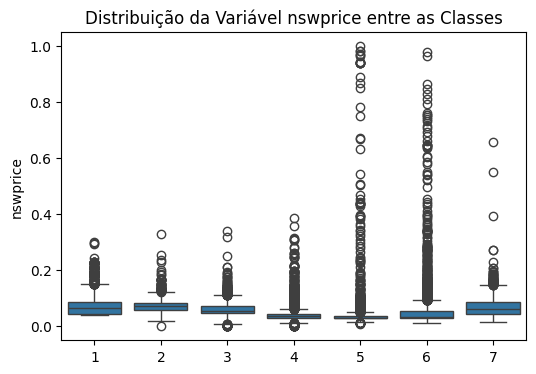

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=sorted(df['day']), y=df["nswprice"])
plt.title("Distribuição da Variável nswprice entre as Classes")
plt.show()

É possível analisar no boxplot que valores de nswprice apresentam **baixa variabilidade** durante os dias 1, 2, 3, 4 e 7 (provavelmente segunda, terça, quarta, quinta e domingo). Já nos dias 5 e 6 (Sexta e Sábado) observa-se **uma maior dispersão e um número elevado de outliers**, sugerindo que nesses dias o preço da energia sofre maiores flutuações, isso faz sentido uma vez que a demanda de energia nesses dias aumenta, bem como o gasto energético, logo faz sentido haver um maior número de outliers nesses dias.

É importante frisar que durante os dias úteis (segunda a quinta), os preços da energia tendem a ser **mais estáveis**, com intervalos interquartis (IQR) **pequenos**, indicando que a maioria dos preços está dentro de uma faixa previsível, o que pode levar a uma maior assertividade pelos modelos de previsão.

#### 3.3.2 nswdemand

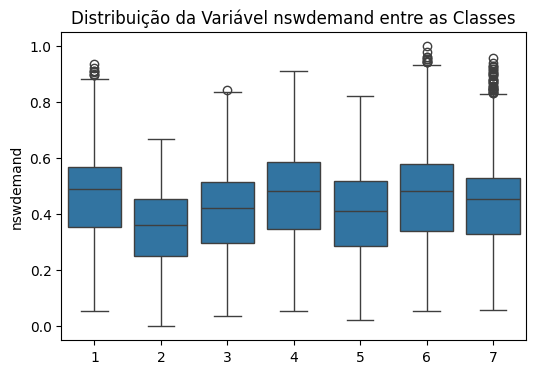

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=sorted(df['day']), y=df["nswdemand"])
plt.title("Distribuição da Variável nswdemand entre as Classes")
plt.show()

A demanda de energia **nswdemand** apresenta uma distribuição relativamente uniforme ao longo dos dias da semana, sem variações drásticas entre os dias, indicando que a variação diária da demanda segue um comportamento previsível. Ainda assim, apesar dessa estabilidade, há uma leve tendência de aumento da demanda nos dias 5 e 6 (sexta e sábado).

É valido frisar a presença de outliers concentrados em valores de alta demanda nos dias 6 e 7 (Sábado e Domingo), Isso sugere que nesses dias ocorrem eventos que impulsionam a demanda de energia acima do normal, o que pode estar associado a uso residencial mais intenso, atividades de lazer ou variações na oferta de energia renovável.

#### 3.3.3 vicprice

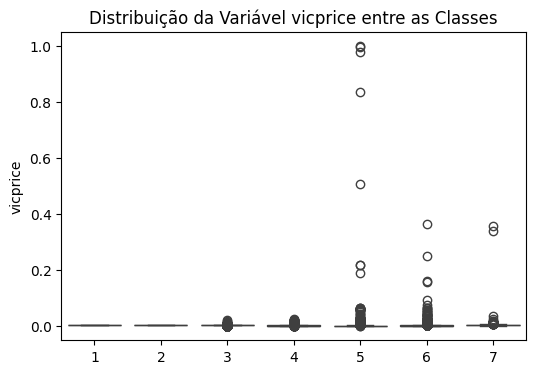

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=sorted(df['day']), y=df["vicprice"])
plt.title("Distribuição da Variável vicprice entre as Classes")
plt.show()

A grande maioria dos valores de vicprice está concentrada próxima de zero para todos os dias da semana, assim como podemos visualizar na sua distribuição ao longo do tempo, ainda assim, há outliers notáveis nos dias 5, 6 e 7 (sexta-feira, sábado e domingo), com valores que atingem 0.8 a 1.0 na escala normalizada, sugerindo que os preços da energia podem ser mais voláteis no final da semana, podendo ser causados por: Maior demanda no final da semana, Ajustes no mercado energético, eventos anormais, como shows.

#### 3.3.4 vicdemand

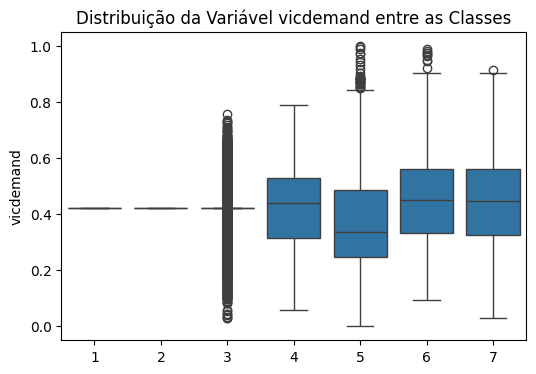

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=sorted(df['day']), y=df["vicdemand"])
plt.title("Distribuição da Variável vicdemand entre as Classes")
plt.show()

Para esse gráfico, o dia 3 chama muita atenção, pois apresenta uma distribuição extremamente atípica, com um grande número de outliers e uma mediana fixa. O fato de os valores ficarem tão concentrados sugere que houve uma limitação na medição da demanda ou uma política de controle de energia nesse dia, ou um erro na medição desses dados.

Para os demais dias da semana, a distribuição da demanda de energia segue um padrão mais natural, com medianas próximas e um intervalo interquartil (IQR) razoável. Isso indica que **o** consumo de energia em Victoria se mantém relativamente estável ao longo da semana, com pequenas variações entre os dias. Ainda assim, observa-se um aumento da mediana e da dispersão nos dias 5, 6 e 7 (sexta-feira a domingo), sugerindo um possível aumento no consumo de energia no final de semana.

#### 3.3.5 transfer

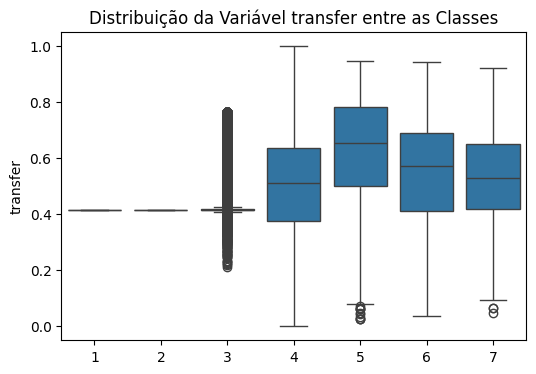

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=sorted(df['day']), y=df["transfer"])
plt.title("Distribuição da Variável transfer entre as Classes")
plt.show()

Mais uma vez, o dia 3 possui um comportamento que aparenta ser anômalo, com uma mediana fixa e um grande número de outliers. Assim como no gráfico de vicdemand, esse comportamento pode indicar um erro na coleta de dados, uma política de restrição de transferência de energia nesse dia ou um limite fixo imposto ao sistema. No resto dos dias observa-se uma distribuição mais natural, com variações progressivas ao longo dos dias.

É possível analisar que a mediana da transferência de energia aumenta a partir de quinta-feira, permanecendo alta até domingo, indicando que a transferência de energia entre regiões tende a ser maior nesses dias.

### 3.4 Redução de Dimensionalidade

A redução de dimensionalidade é uma técnica muito interessante no contexto de análise exploratória dos dados, visto que ao lidar com um conjunto de dados com uma grande quantidade de variáveis (dimensões) pode ser difícil a identificação de padrões e a as relações entre as variáveis. Nesse contexto, resolvemos utilizar 3 técnicas de redução de dimensionalidade para facilitar o processo de exploração dos dados: PCA (Principal Component Analysis), T-SNE (t-Distributed Stochastic Neighbor Embedding) e UMAP (Uniform Manifold Approximation and Projection). Em cada técnica fizemos 2 análises distintas, uma reduzindo os dados para 2 componentes e outra reduzindo os dados para 3 componentes.

In [29]:
df['class'] = df['class'].replace({'UP': 1, 'DOWN': 0})
Y_df = df['class']
X_df = df.drop(columns=['class'])

#### 3.4.1 PCA

O PCA funciona ao realizar transformações nas variáveis originais em um novo conjunto de variáveis, chamadas de componentes principais, a partir de combinações lineares das variáveis, a fim de diminuir a quantidade de variáveis de forma que mantenha as informações essenciais dos dados. A seguir seguem os resultados da utilização do PCA para a redução dos dados para 2 e 3 dimensões:


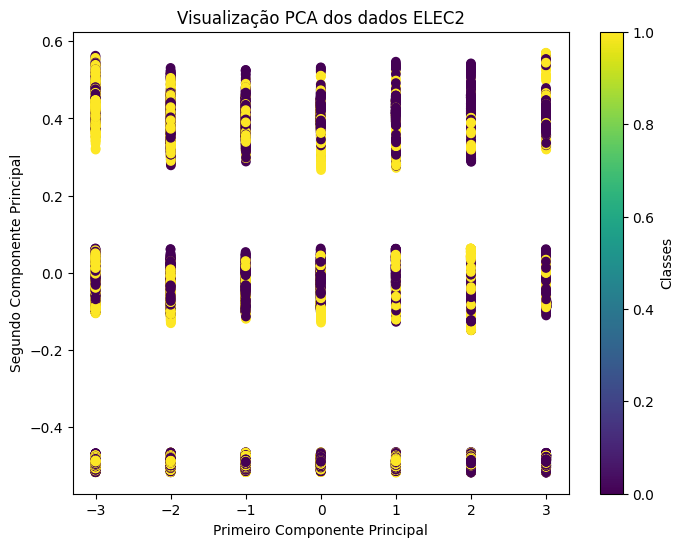

In [30]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_df)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_df, cmap='viridis')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualização PCA dos dados ELEC2')
plt.colorbar(label='Classes')
plt.show()

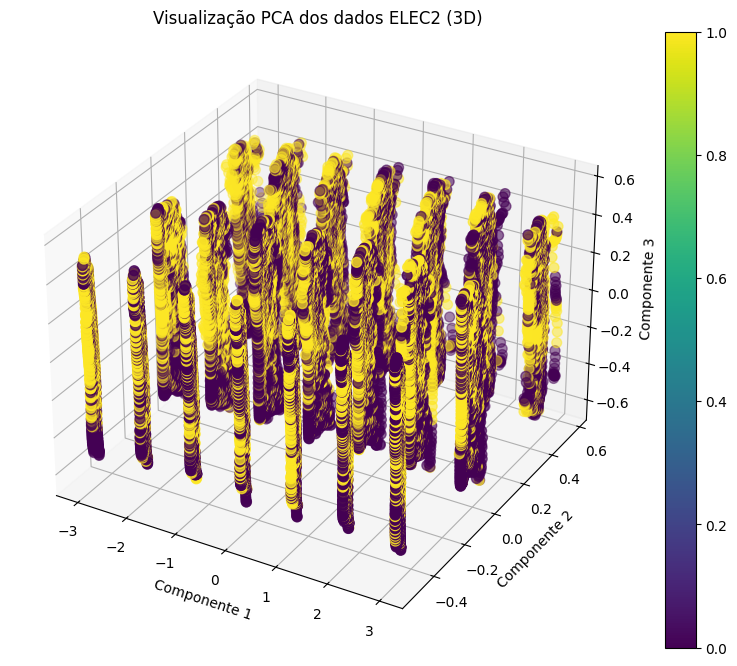

In [31]:
pca_3d = PCA(n_components=3)
X_pca = pca_3d.fit_transform(X_df)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=Y_df, cmap='viridis', s=50)
fig.colorbar(scatter)
ax.set_title("Visualização PCA dos dados ELEC2 (3D)")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
plt.show()

Analisando os resultados obtidos ao aplicar a técnica de PCA para reduzir tanto para 2 dimensões como para 3 dimensões, é possível perceber que os dados quando projetados para as componentes principais estão com uma grande sobreposição. Isso pode indicar que as componentes principais não foram capazes de capturar uma grande variabilidade nos dados, o que revela que pode não haver uma separação muito clara das amostras do dataset.

#### 3.4.2 T-SNE

O t-SNE é uma técnica para visualizar dados de alta dimensionalidade em 2 ou 3 dimensões, mantendo a estrutura de proximidade dos dados. Ele mapeia cada dado como um ponto no novo espaço de forma que dados semelhantes tem maior probabilidade de serem mapeados para pontos próximos, já dados muito distintos tem maior probabilidade de serem mapeados em pontos distantes. A seguir seguem os resultados da utilização do t-SNE para a redução dos dados para 2 e 3 dimensões:

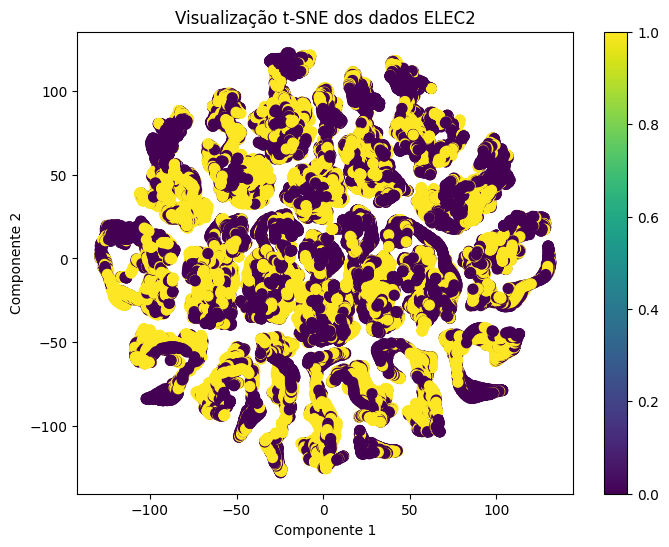

In [32]:
from sklearn.manifold import TSNE

tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne = tsne_2d.fit_transform(X_df)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_df, cmap='viridis', s=50)
plt.colorbar()
plt.title("Visualização t-SNE dos dados ELEC2")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

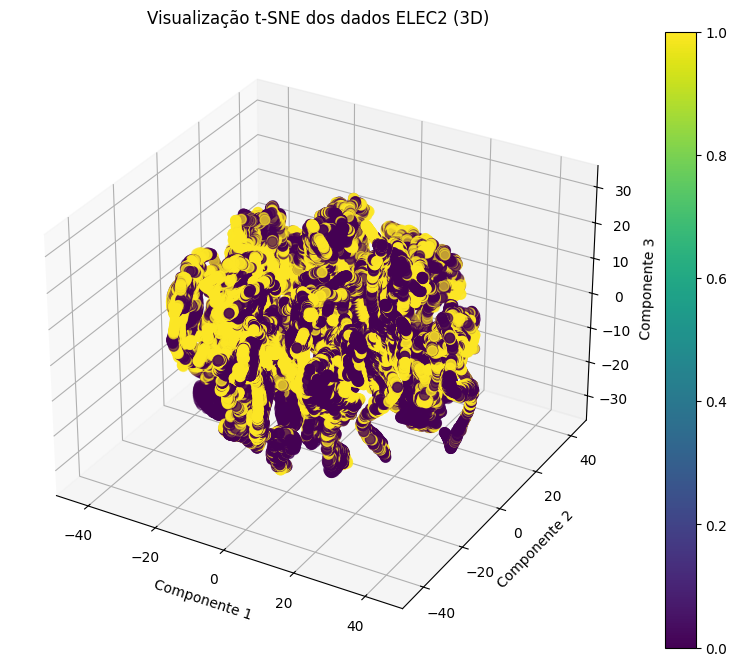

In [33]:
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne = tsne_3d.fit_transform(X_df)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=Y_df, cmap='viridis', s=50)
fig.colorbar(scatter)
ax.set_title("Visualização t-SNE dos dados ELEC2 (3D)")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
plt.show()

Assim como utilizando o PCA, é possível perceber que a utilização do t-SNE também não foi capaz de separar bem os dados projetados em ambas as visualizações (2 e 3 dimensões), demonstrando uma grande sobreposição dos dados. Essa separação corrobora com a ideia de que pode não haver uma separação muito clara entre as classes dos dados no dataset.

#### 3.4.3 UMAP

A técnica UMAP funciona a partir da construção de um gráfico de vizinhança, onde os pontos de dados próximos são conectados. Após essa conexão, a técnica tenta preservar essas relações de vizinhança ao projetar os dados em um espaço de menor dimensão. A seguir seguem os resultados da utilização do UMAP para a redução dos dados para 2 e 3 dimensões:

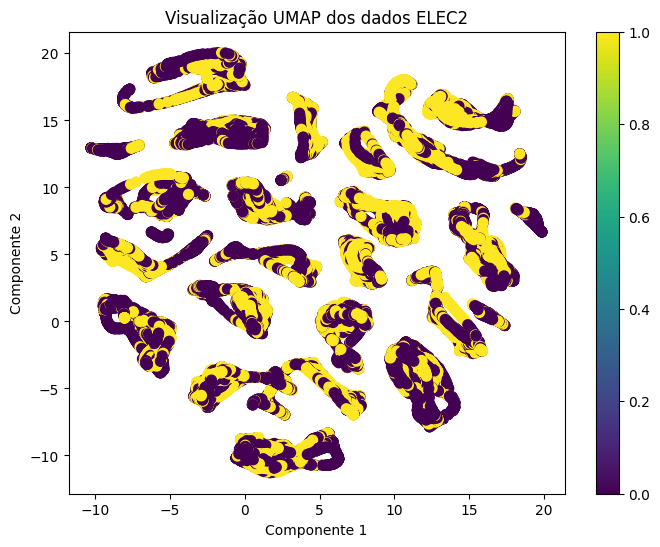

In [37]:
import umap.umap_ as umap

# Criando o modelo UMAP
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_2d.fit_transform(X_df)

# Plotando os dados reduzidos com UMAP
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=Y_df, cmap='viridis', s=50)
plt.colorbar()
plt.title("Visualização UMAP dos dados ELEC2")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


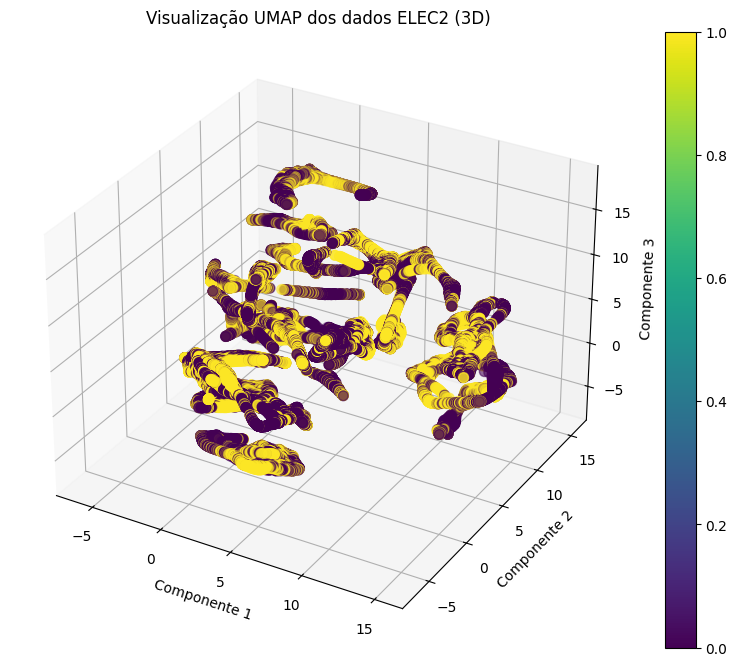

In [38]:
umap_3d = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_3d.fit_transform(X_df)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=Y_df, cmap='viridis', s=50)
fig.colorbar(scatter)
ax.set_title("Visualização UMAP dos dados ELEC2 (3D)")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
plt.show()

Assim como as outras duas técnicas aplicadas (PCA e t-SNE), há uma grande sobreposição dos dados quando reduzimos a sua dimensionalidade utilizando o UMAP, o que fortalece a ideia de que a divisão entre as classes pode ser mais complexa nos dados originais. 

#### 3.4.4 Conclusões

Tendo em vista a aplicação dessas 3 técnicas de redução de dimensionalidade (PCA, t-SNE e UMAP), é possível perceber que, independente da abordagem utilizada, os dados apresentam uma grande sobreposição quando projetados tanto em espaços de 2 dimensões como em espaços de 3 dimensões. Esse comportamento sugere que as classes do dataset ELEC2 podem não ser facilmente separáveis no espaço original, mostrando uma possível complexidade aos dados. Além disso, vale ressaltar que, como já foi levantado em tópicos anteriores, é possível que a normalização feita no dataset não tenha considerado outliers, o que pode ter gerado um impacto nos resultados esperados das técnicas de redução de dimensionalidade, causando grande sobreposição dos dados.

## 4. Qualidade dos Dados

No geral, o dataset apresenta uma qualidade razoável, com dados já normalizados, sem valores nulos e com uma boa distribuição das variáveis categóricas. Ainda assim,é importante reforçar seu amplo uso na literatura, sendo uma referência no campo de predição de variação, o que indica que é possível extrair informações relevantes a partir desses dados.

In [39]:
df.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

No entanto, há alguns questionamentos quanto à qualidade da coleta dos dados. Durante a análise da distribuição, observamos oscilações incomuns em determinados períodos e acentuações extremas, como em nswprice e vicprice, sugerindo a presença de outliers muito discrepantes ou um efeito do processo de normalização, possivelmente Min-Max Scaling. Esse aspecto pode ser um desafio, pois não há informações sobre o método exato de normalização utilizado, tampouco sobre a distribuição original dos dados anteriores ao escalonamento.

Outro ponto crítico está em variáveis como **vicdemand** e **transfer**, que apresentam valores contínuos até certo período e, posteriormente, passam a exibir um comportamento mais realista. Esse padrão ocorreu devido a não obtenção de alguns dados no início da coleta, o que pode impactar modelos preditivos, pois levanta dúvidas sobre a validade desses registros, e se devem ser tratados como outliers ou falhas no dataset.

Apesar dessas limitações, algumas variáveis, como **nswdemand**, apresentam uma **distribuição bem estruturada**, o que demonstra que há partes do dataset que podem ser utilizadas de forma confiável. Entretanto, os problemas identificados reforçam a necessidade de um pré-processamento cuidadoso para garantir que os modelos treinados com esses dados não sejam impactados por padrões artificiais ou inconsistências no conjunto de dados.

### 4.1 Outliers

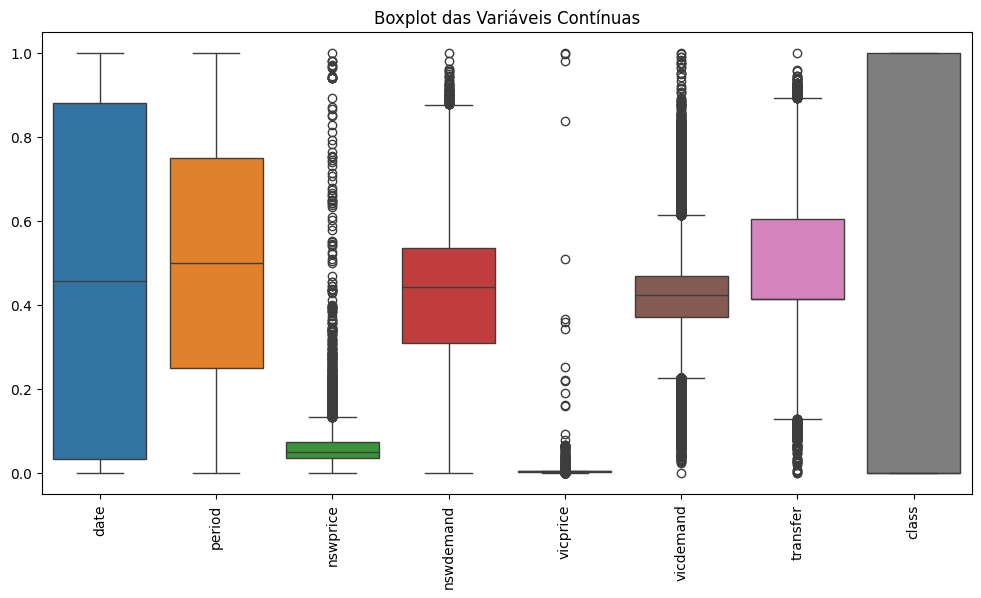

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot das Variáveis Contínuas")
plt.xticks(rotation=90)
plt.show()

In [41]:
# Filtra apenas as colunas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcula Q1, Q3 e IQR para cada coluna numérica
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Detecta outliers
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
outliers

date            0
period          0
nswprice      890
nswdemand      83
vicprice     3683
vicdemand    6052
transfer      420
class           0
dtype: int64

Como é possível analisar no gráfico, a distribuição da data (*date*) é relativamente uniforme, sem outliers evidentes. Isso ocorre porque o tempo é uma variável crescente e normalizada. Já o período do dia (*period*), apresenta uma similaridade com a data, ou seja, tem uma distribuição uniforme, confirmando que os períodos do dia foram normalizados igualmente (dividindo o dia em 30 minutos), também não apresentou outliers, o que faz sentido para uma variável temporal normalizada.

Nesse Hiato, sobre a distribuição do preço (*nswprice*) e (*vicprice*), ambos apresentam um intervalo interquartil pequeno e uma grande quantidade de outliers. Isso indica que a maioria dos preços está concentrada em valores baixos, mas há flutuações extremas ocasionais, possivelmente relacionadas a variações súbitas no mercado de eletricidade e eventos atípicos. Se houver picos que não representam eventos reais, como um valor absurdamente maior que a maioria, pode ter sido causado por um problema na medição e essas ocorrências precisariam ser removidas nas próximas etapas.

Já em relação à demanda de eletricidade, tanto (*nswdemand*) quanto (*vicdemand*) possuem distribuições mais amplas, com (*vicdemand*) apresentando menos outliers. Apesar disso, ambas mostram valores extremos, sugerindo picos de consumo que podem estar associados a períodos de alta demanda ou mudanças nas condições do sistema elétrico. Para as ocorrências que poderiam ser retiradas relacionadas a demanda, seriam relacionados a valores impossíveis ou inconstantes.

Por fim, as transferências programadas entre estados (*transfer*) apresentam uma distribuição relativamente uniforme, mas com a presença de outliers. Isso indica que, mesmo que a maior parte das transferências ocorra dentro de um intervalo esperado, há momentos em que variações significativas acontecem, possivelmente devido a ajustes operacionais no sistema de distribuição de eletricidade. Além disso, valores fora do intervalo esperado em transferências (*transfer*) que possam ter sido causados por erro técnico podem ser retirados do dataset.

## 5. Dificuldade e Correções

Como analisado anteriormente, o dataset apresenta alguns desafios que podem impactar a qualidade dos modelos que serão treinados nas próximas fases do processo CRISP-DM. O desbalanceamento das classes-alvo, embora presente, não parece ser um fator crítico, pois a distribuição não é extremamente desigual. Ainda assim, realizaremos testes com dados balanceados para avaliar possíveis impactos. O balanceamento será conduzido por meio da remoção de algumas instâncias da classe majoritária (*DOWN*), embora não prevemos que essa abordagem tenha um impacto significativo no desempenho dos modelos treinados.

Nesse hiato, a abordagem para outliers será criteriosa, evitando a remoção excessiva para não comprometer a representatividade dos dados. Embora os gráficos indiquem uma grande quantidade de valores extremos, eliminá-los completamente pode distorcer padrões relevantes. Dentre elas, a variável vicprice é a que mais exige atenção, pois apresenta outliers significativamente distantes da distribuição, como foi possível observar em seu histograma. Para avaliar seu impacto nos modelos, realizaremos testes com e sem esses valores.  Por fim a estratégia geral será baseada em testes experimentais, garantindo que apenas outliers prejudiciais à modelagem sejam removidos, preservando a integridade e a qualidade dos dados.

Um dos desafios encontrados na análise foi o fato de os dados já terem sido normalizados previamente. Embora essa pré-processamento facilite algumas etapas, ele também limita a flexibilidade de modelagem e impede a aplicação de outras técnicas de normalização. A normalização utilizada, possivelmente da família Min-Max Scaling, acentua a influência dos outliers, o que pode impactar negativamente o treinamento dos modelos.

Além disso, a ausência de uma separação prévia entre dados de treinamento e teste introduziu um problema de data leak, já que todo o conjunto de dados foi normalizado em conjunto. Isso significa que informações do conjunto de treino foram inadvertidamente propagadas para o teste, comprometendo a imparcialidade da avaliação dos modelos. Esse efeito pode distorcer os resultados ao fazer com que os modelos apresentem um desempenho artificialmente elevado, sem refletir sua real capacidade de generalização. Infelizmente não há muito o que fazer em relação a esse vazamento.

Outro problema a ser enfrentado, está relacionado a adição das novas features vicprice, vicdemand e transfer no meio da extração de dados, o que fez com que os dados, provavelmente tenham sido populados artificialmente, utilizando valores como a média dos dados, isso pode levar a uma perca de generalização desses modelos e a viéses negativos. Durante a fase de testes será necessário realizar testes com e sem esses dados iniciais a fim de investigar o impacto da presença deles nos modelos, mas provavelmente sua retirada ajudará no desempenho dos modelos.

Outro problema a ser enfrentado, é a adição tardia das variáveis **vicprice** e **vicdemand** no meio do processo de extração de dados. Uma vez que esses atributos provavelmente foram preenchidos artificialmente, possivelmente com valores médios. Esse fenômeno pode comprometer a generalização dos modelos e introduzir viéses negativos, prejudicando a capacidade preditiva. Durante a fase de testes, será fundamental comparar o desempenho dos modelos com e sem esses dados iniciais, avaliando o impacto de sua presença. Caso esses atributos estejam de fato distorcendo os resultados, sua remoção pode ser a melhor alternativa para garantir maior estabilidade e precisão na modelagem.

Por fim, a aplicação das técnicas de redução de dimensionalidade revelou que os dados apresentam uma grande sobreposição, independentemente do método utilizado. Essa falta de separabilidade sugere que a classificação pode ser um problema desafiador, indicando uma complexidade do dataset. Além disso, a normalização aplicada sem um tratamento adequado de outliers pode ter contribuído para essa sobreposição, impactando os resultados das projeções. Diante desse cenário, será necessário explorar modelos mais robustos e realizar buscas extensivas de hiperparâmetros para otimizar o desempenho preditivo.